In [11]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm


import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('cashflowforecast.csv')

In [7]:
df.head()


,Month,Cashflow at the end
0,2012.03.31,"26,731,441"
1,2012.09.30,"71,994,170"
2,2012.12.31,"108,633,183"
3,2013.03.31,"186,053,544"
4,2013.06.30,"202,489,744"


In [8]:
df.tail()

,Month,Cashflow at the end
19,2017.03.31,"1,024,654,683"
20,2017.06.30,"1,083,800,732"
21,2017.09.30,"606,937,593"
22,2017.12.31,"1,341,262,558"
23,2018.03.31,"1,008,737,712"


In [9]:
# Define the SARIMA order and seasonal order
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 4)  # (P, D, Q, s)

In [15]:
# Fit the SARIMA model
sarima_model = sm.tsa.SARIMAX(df['Cashflow at the end'], order=order, seasonal_order=seasonal_order)
results = sarima_model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [13]:
print(df['Cashflow at the end'].dtype)


object


In [14]:
df['Cashflow at the end'] = pd.to_numeric(df['Cashflow at the end'], errors='coerce')


In [16]:
# Summary of the SARIMA model
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:               Cashflow at the end   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                   0.000
Date:                           Mon, 13 Nov 2023   AIC                             10.000
Time:                                   00:56:53   BIC                             14.722
Sample:                                        0   HQIC                            10.799
                                            - 24                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1363: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

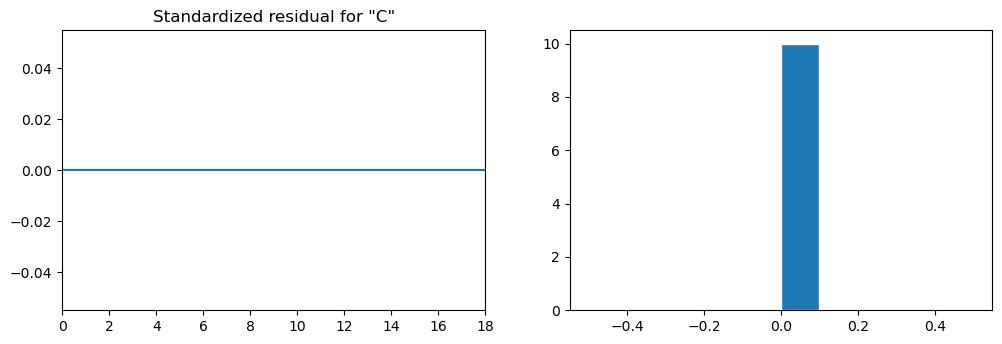

In [17]:
# Plot the SARIMA model diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.show()

In [20]:
# Forecast future cash flows for the next year (four quarters)
forecast_periods = 4  # Number of future quarters to forecast

In [21]:
# Get the last date in the DataFrame
last_date = df.index[-1]

In [22]:
# Calculate the forecast start and end dates using pd.DateOffset
#forecast_start_date = last_date + pd.DateOffset(months=3)
#forecast_end_date = last_date + pd.DateOffset(months=12)

TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'

In [26]:
import pandas as pd

# Assuming last_date is a Timestamp object
last_date = pd.Timestamp('2023-01-01')

# Calculate the forecast start and end dates using pd.DateOffset
forecast_start_date = last_date + pd.DateOffset(months=3)
forecast_end_date = last_date + pd.DateOffset(months=12)

# Print the results
print("Forecast Start Date:", forecast_start_date)
print("Forecast End Date:", forecast_end_date)


Forecast Start Date: 2023-04-01 00:00:00
Forecast End Date: 2024-01-01 00:00:00


In [31]:
# Generate a date range for the forecast
forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='Q')

In [32]:
 # Forecast future values for each type
    forecast_periods = 8  # Number of future quarters to forecast

    # Get the last date in the DataFrame
    last_date = df['Date'].iloc[-1]

    # Calculate the forecast start and end dates using pd.DateOffset
    forecast_start_date = last_date + pd.DateOffset(months=3)
    forecast_end_date = last_date + pd.DateOffset(months=24)  # Extend the forecast to 2024

    # Generate a date range for the forecast, including 2023
    forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='Q')

    # Forecast future values
    forecast = results.get_forecast(steps=forecast_periods, index=forecast_index)

    # Get the forecasted values and confidence intervals
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

IndentationError: unexpected indent (2192998346.py, line 2)

In [34]:
# Forecast future values for each type
forecast_periods = 8  # Number of future quarters to forecast

# Get the last date in the DataFrame
last_date = df['Month'].iloc[-1]

# Calculate the forecast start and end dates using pd.DateOffset
forecast_start_date = last_date + pd.DateOffset(months=3)
forecast_end_date = last_date + pd.DateOffset(months=24)  # Extend the forecast to 2024

# Generate a date range for the forecast, including 2023
forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='Q')

# Forecast future values
forecast = results.get_forecast(steps=forecast_periods, index=forecast_index)

# Get the forecasted values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()




TypeError: can only concatenate str (not "DateOffset") to str